In [2]:
# Importing Library
from datasets import load_dataset
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Loading Dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
# Only the data analyst jobs of the United States.
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop all the Nan values from the salary_year_avg column.
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

# Check the dataframes.
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782637,Data Analyst,Data Integration Analyst,"Germantown, WI",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-01-20 06:18:43,True,False,United States,year,70000.0,NaN,Virtual Benefits Administrator,"[vba, sql, sql server]","{'databases': ['sql server'], 'programming': [..."
782798,Data Analyst,Reference Data Analyst,"New York, NY",via Ai-Jobs.net,Full-time,False,"New York, United States",2023-04-21 05:59:51,True,False,United States,year,111175.0,NaN,DRW,[terminal],{'other': ['terminal']}
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","[sql, r, python, hadoop, excel]","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,[unix],{'os': ['unix']}


In [7]:
# Now, we explode the job_skills columns.
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,sql,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,vba,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,tableau,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,excel,"{'analyst_tools': ['tableau', 'excel', 'altery..."


In [15]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)

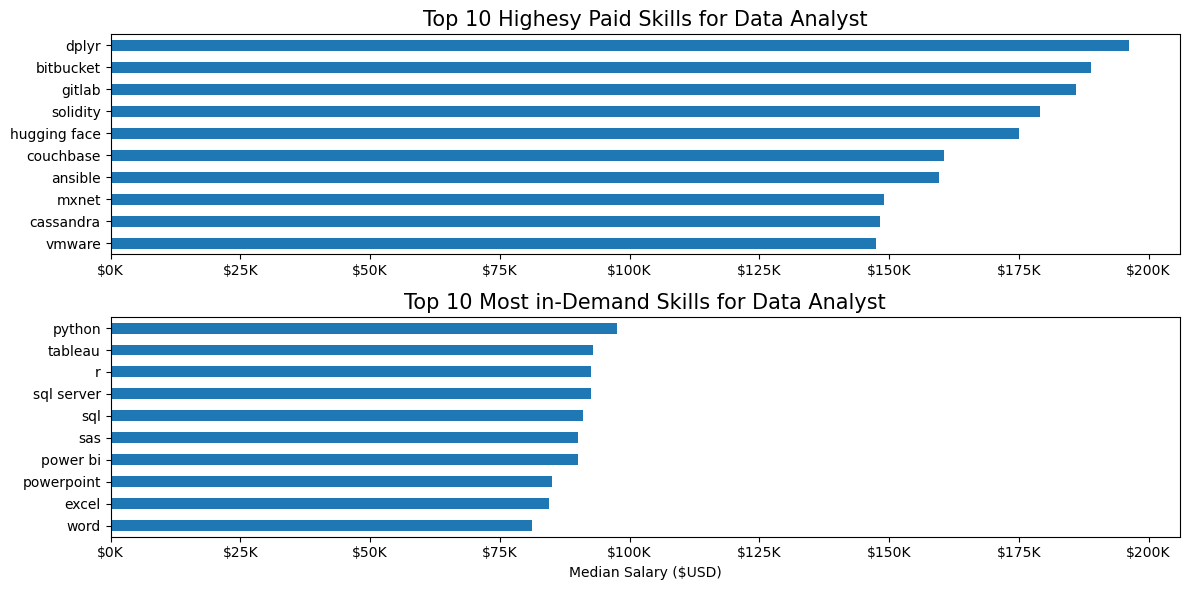

In [28]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Top 10 Highesy Paid Skills for Data Analyst", fontsize=15)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend().set_visible(False)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1])
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title("Top 10 Most in-Demand Skills for Data Analyst", fontsize=15)
ax[1].set_xlabel("Median Salary ($USD)")
ax[1].set_ylabel("")
ax[1].legend().set_visible(False)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

fig.tight_layout()